# Comparative Analysis of Autoencoder-Based and PCA-Based Dimensionality Reduction Techniques for Gene Expression Data

# Introduction 

# Project Overview


## Loading all pakacges need in the project

## Import Libraries

The following Python libraries are imported for various purposes:

- **Data Manipulation and Visualization Libraries**:
    - `os`: Used for interacting with the operating system, primarily for path operations.
    - `numpy (np)`: Used for numerical operations.
    - `pandas (pd)`: Used for data manipulation and reading CSV files.
    - `matplotlib.pyplot (plt)`: Used for plotting graphs.
    - `seaborn (sns)`: Used for creating attractive and informative statistical graphics.

- **Model Building and Training Libraries**:
    - `tensorflow.keras.models.Model`: Used for building and training the autoencoder neural network model.
    - `tensorflow.keras.layers`: Contains `Input`, `Dense`, and `Dropout` for building the layers of the neural network model.
    - `tensorflow (tf)`: Used for training and inference of deep neural networks.
    - `tensorflow.keras.models.load_model`: Used to load a previously saved model.

- **Data Preprocessing and Analysis Libraries**:
    - `sklearn.model_selection.train_test_split`: Used for splitting data into training and validation sets.
    - `scipy.stats`: In this context, it is used to compute the Pearson correlation coefficient between the original and predicted data.
    - `sklearn.preprocessing.StandardScaler`: Used to standardize features by removing the mean and scaling to unit variance.
    - `sklearn.decomposition.PCA`: Used for performing Principal Component Analysis (PCA).

## Package Versions

Knowing the versions of the packages is important for reproducibility purposes. Here are the versions of the packages used:

- **numpy**: 1.26.1
- **pandas**: 1.4.1
- **matplotlib**: 3.5.1
- **sklearn**: 1.3.2
- **tensorflow**: 2.15.0
- **scipy**: 1.11.3
- **seaborn**: 0.12.2
- **matplotlib_venn**: 0.11.10

In [2]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import load_model
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Autoencoder Implementation 

## Setup and Initialization

Initially, we started setting the directory containing the gene expression data and defining a set of hyperparameters for the autoencoder model. These hyperparameters include the size of the latent space, the architecture of the neural network (such as the number of hidden layers, size of the first hidden layer, dropout rate for regularisation), and training parameters (number of epochs, batch size, and activation function).

## Data Loading

The load_data function was used for importing gene expression data from a given file path. As part of its operation, it reads the data and displays the initial portion, to have a quick insight into the data structure, to see if the data was loaded correctly.

## Model Construction

The build_ae function was used for building the model based on the previously defined parameters. This involves setting up the input layer, adding multiple hidden layers with optional dropout for regularisation, and defining the latent space where data is compressed. The model is then compiled with the adam optimiser and mse as the loss function, setting the stage for training.

## Training the Model

With the model constructed, train_ae function proceeds to divide the gene expression data into training and validation subsets. The model is trained on the training subset, using the validation subset to evaluate its performance throughout the training process. This step is important  for optimising the model's parameters and preventing overfitting.

## Evaluation and Visualization

After training, we visualise the model to assess the its performance. The plot_loss function generated plots for the training and validation loss over time, providing insights into how well the model is learning. Additionally, plot_reconstruction_error function ploted the reconstruction error, which measures how accurately the autoencoder can reproduce the input data after compression and decompression. This is particularly useful for identifying outliers or anomalies in the data.

## Feature Extraction and Transformation

The extract_and_multiply_weights function, first it operate in the extraction of weights from the layers of the model. These weights, which are learned during the autoencoder's training phase, are specifically extracted from three distinct layers. The weights transitioning from the input layer to the first hidden layer are captured in weight_1. The weights transitioning from the first hidden layer to the second hidden layer are captured in weight_2. Lastly, the weights transitioning from the second hidden layer to the latent layer are captured in weight_3.

The second operation of the function was the computation of the combined transformation matrix. The extracted weights were then combined through matrix multiplication to compute an overall transformation matrix. This matrix multiplication process, which can be viewed as a linear approximation, involved multiplying weights along paths to derive a measure comparable to the loadings of PCA.

                 TDP93C287  TDP93TDPC014  TDP93TDPC068  TDP93TDPC134  \
ENSG00000000419   8.655586      9.319748      9.910092      8.151097   
ENSG00000000457   7.536906      8.075948      8.562040      8.864825   
ENSG00000000460   7.173539      6.843101      7.104987      7.161539   
ENSG00000000938  10.961783      7.433909     10.440624      9.927085   
ENSG00000000971   5.773083      7.706707      6.704198      4.321877   

                 TDP94C022  TDP94C035  TDP94C079  TDP94C100  TDP94C158  \
ENSG00000000419   9.329317   8.670321   9.291516   8.831926   9.420048   
ENSG00000000457   7.450732   8.457329   7.398729   7.958971   8.038661   
ENSG00000000460   8.923964   7.818642   6.657649   7.917220   6.311222   
ENSG00000000938   6.807541  10.697348  11.882826   7.289811   8.493930   
ENSG00000000971   5.031730   8.032692   3.906962   8.108656   5.925756   

                 TDP94C240  ...  TDPPS900181  TDPPS900196  TDPPS910112  \
ENSG00000000419   8.795597  ...     9.342703    

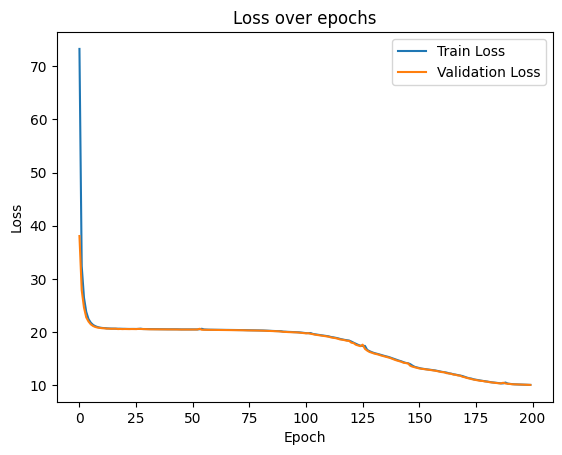

4/4 [==============================] - 0s 11ms/step


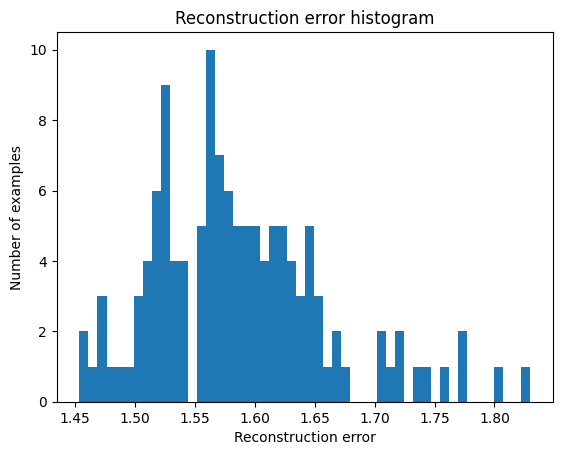

Combined Transformation Matrix Shape: (17259, 85)


In [25]:
# Define the directory where the data is stored
DATA_DIR = 'C:/Users/ABDULLAHI HAJI/OneDrive/Documents/Thesis_poject/GSE216738_RAW_COUNTS_Abnormal-AML-50bp'

# Define the hyperparameters for the autoencoder model
params = {
    'latent_dim':85,  # The dimensionality of the latent space
    'depth': 2,  # The number of hidden layers in the encoder and decoder
    'first_layer_size': 500,  # The size of the first hidden layer
    'dropout_rate': 0,  # The dropout rate used after each layer
    'epochs': 200,  # The number of epochs to train for
    'batch_size': 80,  # The batch size used in training
    'activation': 'relu',  # The activation function used in each layer
}

def load_data(filepath):
    """Load the data from a CSV file."""
    # Read the CSV file at the given filepath and return it as a pandas DataFrame
    data = pd.read_csv(filepath, index_col=0)
    print(data.head())  # Print the first few rows of the DataFrame
    return data

def build_ae(original_dim, params):
    """Build the autoencoder model."""
    # Define the input layer
    input_layer = Input(shape=(original_dim,))
    
    # Define the first hidden layer and apply dropout
    encoded = Dense(params['first_layer_size'], activation=params['activation'])(input_layer)
    encoded = Dropout(params['dropout_rate'])(encoded)
    
    # Add additional hidden layers with dropout
    for _ in range(params['depth'] - 1):
        encoded = Dense(params['first_layer_size'], activation=params['activation'])(encoded)
        encoded = Dropout(params['dropout_rate'])(encoded)
    
    # Define the latent space layer and the output layer
    encoded = Dense(params['latent_dim'], activation=params['activation'])(encoded)
    decoded = Dense(original_dim, activation=params['activation'])(encoded)
    
    # Define the autoencoder model and compile it
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    
    # Print the summary of the model
    autoencoder.summary()
    return autoencoder

def train_ae(autoencoder, X_train, X_val, params):
    """Train the autoencoder model."""
    # Train the model using the training data (75% of the data) and validate it using the validation data(25% of the data)
    history = autoencoder.fit(X_train, X_train,
                              epochs=params['epochs'],
                              batch_size=params['batch_size'],
                              shuffle=True,
                              validation_data=(X_val, X_val))
    return autoencoder, history

def plot_loss(history):
    """Plot the training and validation loss."""
    # Create a new figure
    plt.figure()
    
    # Plot the training loss and validation loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    
    # Add a title and labels to the plot
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    #save plot
    plt.savefig('training loss and validation loss plot.png')
    # Display the plot
    plt.show()

def plot_reconstruction_error(autoencoder, X_test):
    """Plot the reconstruction error on the test set."""
    # Use the autoencoder to reconstruct the test data
    reconstructions = autoencoder.predict(X_test)
    
    # Calculate the reconstruction error
    reconstruction_error = np.mean(np.abs(reconstructions - X_test), axis=1)
    
    # Create a new figure
    plt.figure()
    
    # Plot a histogram of the reconstruction error
    plt.hist(reconstruction_error, bins=50)
    
    # Add a title and labels to the plot
    plt.title('Reconstruction error histogram')
    plt.xlabel('Reconstruction error')
    plt.ylabel('Number of examples')
    
    # Display the plot
    plt.show()
def extract_and_multiply_weights(autoencoder):
    """Extracts weights from the trained autoencoder and computes the combined transformation matrix."""
    # Extract weights
    weight_1 = autoencoder.layers[1].get_weights()[0]  # Input to First Hidden Layer
    weight_2 = autoencoder.layers[3].get_weights()[0]  # First Hidden Layer to Second Hidden Layer
    weight_3 = autoencoder.layers[5].get_weights()[0]  # Second Hidden Layer to Latent Layer
    
    # Perform matrix multiplication
    combined_transformation = np.dot(np.dot(weight_1, weight_2), weight_3)
    return combined_transformation
def main():
    """Main function to run the pipeline."""
    # Define the filepath of the data
    filepath = os.path.join(DATA_DIR, 'normCounts_res.CSV')
    
    # Load the data
    data = load_data(filepath)
    
    # Get the original dimension of the data (number of genes)
    original_dim = data.shape[0]
    
    # Transpose the data because the neural network expects samples as rows
    data_transposed = data.transpose()
    
    # Split the data into training and validation sets (75%, 25%)
    X_train, X_val = train_test_split(data_transposed, test_size=0.25, random_state=42)
    
    # Build the autoencoder model
    autoencoder = build_ae(original_dim, params)
    
    # Train the autoencoder model
    trained_autoencoder, history = train_ae(autoencoder, X_train, X_val, params)

    # Create a separate encoder model from the trained autoencoder
    encoder = Model(inputs=trained_autoencoder.input, outputs=trained_autoencoder.layers[-2].output)

    # Transform the input data into the latent space to get the latent features
    latent_features = encoder.predict(data_transposed)

    # Save the latent features to a CSV file
    pd.DataFrame(latent_features, index=data_transposed.index).to_csv('latent_features.csv')

    # Plot the loss curves and reconstruction error
    plot_loss(history)
    plot_reconstruction_error(trained_autoencoder, X_val)
    

    # Save the trained autoencoder and encoder models
    trained_autoencoder.save('autoencoder_model.keras')
    encoder.save('encoder_model.keras')
    
    combined_transformation_matrix = extract_and_multiply_weights(trained_autoencoder)
    
    print("Combined Transformation Matrix Shape:", combined_transformation_matrix.shape)
    # Convert the numpy array to a pandas DataFrame
    df = pd.DataFrame(combined_transformation_matrix)
    # Extract the combined transformation matrix
    combined_transformation_matrix = extract_and_multiply_weights(trained_autoencoder)
    
    # Convert the numpy array to a pandas DataFrame, using gene names as the index
    combined_transformation_df = pd.DataFrame(combined_transformation_matrix, index=data.index)

    # Save the DataFrame to a CSV file
    combined_transformation_df.to_csv('combined_transformation_matrix_with_genes.csv')

# Run the main function if the script is run directly (not imported as a module)
if __name__ == "__main__":
    main()


In the step below, we first load the dataset. Using a pre-trained autoencoder model, we then generate predictions on the data. Following this, we compute the correlation between the original and predicted data for each sample. To visualize the distribution of these correlations, we create appropriate plots. The aim is to have the R-squared value as close as possible to the loading of the PCA. Achieving this allows us to make a fair comparison between the performance of the autoencoder model and the PCA model.

                 TDP93C287  TDP93TDPC014  TDP93TDPC068  TDP93TDPC134  \
ENSG00000000419   8.655586      9.319748      9.910092      8.151097   
ENSG00000000457   7.536906      8.075948      8.562040      8.864825   
ENSG00000000460   7.173539      6.843101      7.104987      7.161539   
ENSG00000000938  10.961783      7.433909     10.440624      9.927085   
ENSG00000000971   5.773083      7.706707      6.704198      4.321877   

                 TDP94C022  TDP94C035  TDP94C079  TDP94C100  TDP94C158  \
ENSG00000000419   9.329317   8.670321   9.291516   8.831926   9.420048   
ENSG00000000457   7.450732   8.457329   7.398729   7.958971   8.038661   
ENSG00000000460   8.923964   7.818642   6.657649   7.917220   6.311222   
ENSG00000000938   6.807541  10.697348  11.882826   7.289811   8.493930   
ENSG00000000971   5.031730   8.032692   3.906962   8.108656   5.925756   

                 TDP94C240  ...  TDPPS900181  TDPPS900196  TDPPS910112  \
ENSG00000000419   8.795597  ...     9.342703    

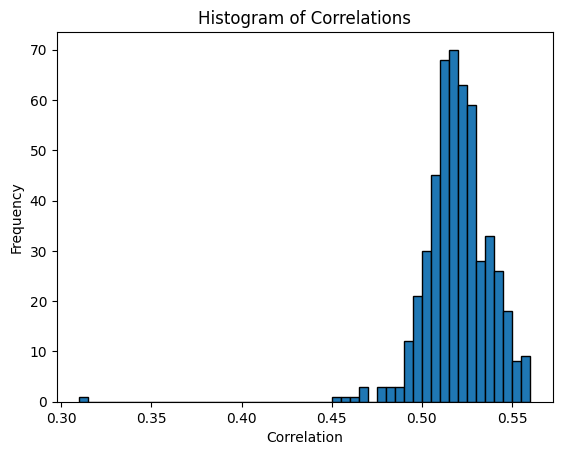

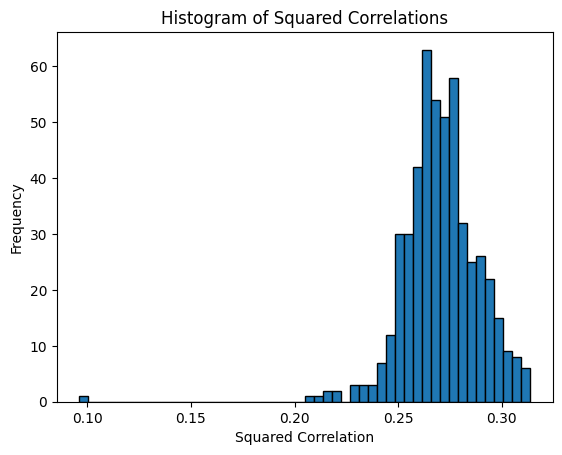

In [26]:
# Define the directory where the data is stored
DATA_DIR = 'C:/Users/ABDULLAHI HAJI/OneDrive/Documents/Thesis_poject/GSE216738_RAW_COUNTS_Abnormal-AML-50bp'

def load_data(filepath):
    """Load the data from a CSV file."""
    # Read the CSV file and print the first few rows
    data = pd.read_csv(filepath, index_col=0)
    print(data.head())
    return data

# Construct the full path to the CSV file
filepath = os.path.join(DATA_DIR, 'normCounts_res.CSV')
# Load the data
data = load_data(filepath)
# Get the number of genes (rows)
original_dim = data.shape[0]  

# Transpose data because the neural network expects samples as rows
data_transposed = data.transpose()

# Load the pre-trained autoencoder model
loaded_model = load_model('autoencoder_model.keras')

# Make predictions using the model
predicted = loaded_model.predict(data_transposed)

# Initialize a list to store the correlations and squared correlations
correlations = []
squared_correlations = []

# Iterate over each row in the DataFrame
for row in range(data_transposed.shape[0]):
    # Get the original and predicted data for this row (feature)
    original_data = data_transposed.iloc[row, :].values.flatten()
    predicted_data = predicted[row, :].flatten()

    # Check for NaN or infinite values and handle them
    if np.any(np.isnan(original_data)) or np.any(np.isnan(predicted_data)):
        print(f"Skipping row {row} due to NaN values")
        continue
    if np.any(np.isinf(original_data)) or np.any(np.isinf(predicted_data)):
        print(f"Skipping row {row} due to infinite values")
        continue

    # Check for zero standard deviation and handle it
    if np.std(original_data) == 0 or np.std(predicted_data) == 0:
        print(f"Skipping row {row} due to zero standard deviation")
        continue

    # Compute the correlation for this row (feature)
    correlation, _ = scipy.stats.pearsonr(original_data, predicted_data)  # Changed to Pearson correlation
    correlations.append(correlation)
    squared_correlations.append(correlation**2)  # Add the squared correlation

# Print the number of correlations computed
print("Number of correlations computed: ", len(correlations))

# Compute the average correlation and average squared correlation
average_correlation = np.mean(correlations)
average_squared_correlation = np.mean(squared_correlations)

# Print the average correlation and average squared correlation
print("Average Correlation: ", average_correlation)
print("Average Squared Correlation: ", average_squared_correlation)

# Create a histogram of the correlations
plt.hist(correlations, bins=50, edgecolor='black')
plt.title('Histogram of Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the squared correlations
plt.hist(squared_correlations, bins=50, edgecolor='black')
plt.title('Histogram of Squared Correlations')
plt.xlabel('Squared Correlation')
plt.ylabel('Frequency')
plt.show()


# Identifying Top 500 Genes from Combined Weights Matrix ( from the AE model)

In his step we identify the top 500 genes based on their importance scores. we begins by loading a combined weights matrix from a specified file path. Each gene's importance score is calculated by summing the absolute values of its weights across different features. The genes are then sorted in descending order of their importance scores. The top 500 genes are selected and optionally saved to a new CSV file for further analysis. Finally, the names and scores of the top 500 genes are printed.

In [27]:
# Load the combined weights matrix
file_path = 'C:/Users/ABDULLAHI HAJI/combined_transformation_matrix_with_genes.csv'
weights_df = pd.read_csv(file_path, index_col=0)  # The first column contains gene names

# Calculate an overall importance score for each gene
# Here, I'm using the sum of weights across different features .
gene_importance = weights_df.abs().sum(axis=1)

# Sort genes by their importance score in descending order
sorted_genes = gene_importance.sort_values(ascending=False)

# Select the top 500 genes
top_500_genes = sorted_genes.head(500)

# Optionally, save the top 500 genes to a new CSV file for further analysis
top_500_genes.to_csv('top_500_genes_from_autoencoder.csv')

# Print or output the top 500 genes
print(top_500_genes)


ENSG00000265369    1.489900
ENSG00000164125    1.463906
ENSG00000153560    1.440316
ENSG00000000938    1.418589
ENSG00000136521    1.418577
                     ...   
ENSG00000266049    1.220805
ENSG00000140464    1.220662
ENSG00000131023    1.220605
ENSG00000109390    1.220520
ENSG00000181163    1.220266
Length: 500, dtype: float64


# PCA Implementation 

Next step was  performing Principal Component Analysis (PCA) on a dataset to identify the top 500 genes based on their contributions to each principal component. The data is loaded, transposed, and standardized before PCA is applied.Once the data was appropriately preprocessed, we applied PCA. The number of principal components to retain was determined by examining a scree plot.Based on the scree plot, we decided to focus on the first four principal components.We then calculated the combined loadings of each gene across these four principal components. Loadings represent the weights of each gene in the principal components and can be interpreted as the correlation between the genes and the principal components. By combining the loadings from the first four principal components, we were able to capture the genes that contribute most significantly across all four components.

From this analysis, we selected the top 500 genes with the highest combined loadings. These genes are considered to be the most influential in our dataset based on the first four principal components. For further analysis and potential future reference, we saved these top 500 genes to a CSV file.


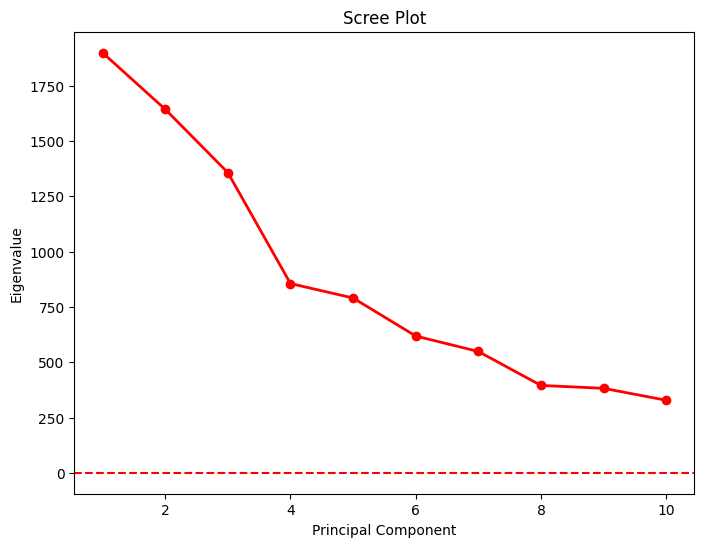

PC1 explains 10.98% of the variance.
PC2 explains 9.50% of the variance.
PC3 explains 7.85% of the variance.
PC4 explains 4.95% of the variance.
PC5 explains 4.57% of the variance.
PC6 explains 3.58% of the variance.
PC7 explains 3.17% of the variance.
PC8 explains 2.29% of the variance.
PC9 explains 2.21% of the variance.
PC10 explains 1.90% of the variance.
                PC1       PC2       PC3           PC4       PC5           PC6  \
0      1.017973e-05  0.000078  0.000248  8.299329e-07  0.000059  1.468086e-05   
1      4.622399e-06  0.000030  0.000156  6.003047e-05  0.000259  3.743201e-06   
2      1.525806e-04  0.000001  0.000129  1.381657e-05  0.000001  4.004638e-05   
3      5.450408e-07  0.000338  0.000075  6.574233e-06  0.000119  3.220481e-05   
4      1.599617e-05  0.000002  0.000016  4.288254e-05  0.000003  7.150155e-09   
...             ...       ...       ...           ...       ...           ...   
17254  3.117600e-05  0.000094  0.000035  6.217472e-06  0.000017  5.8084

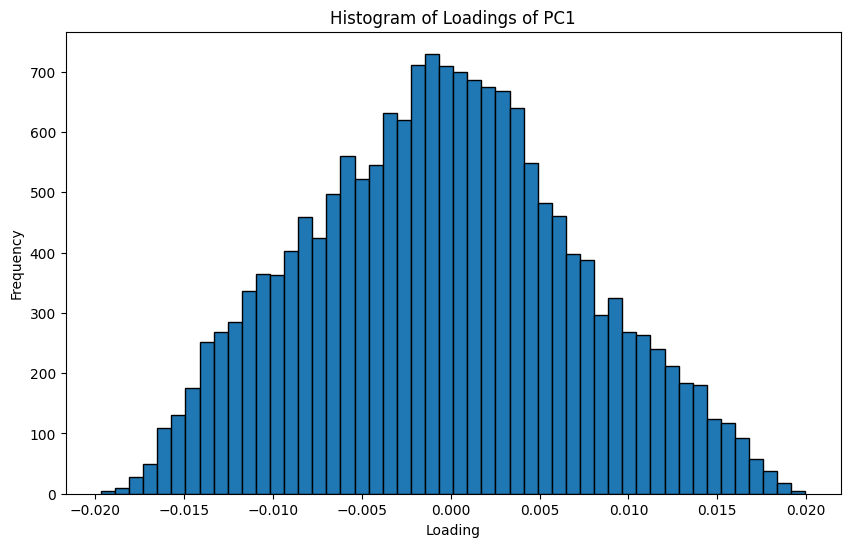

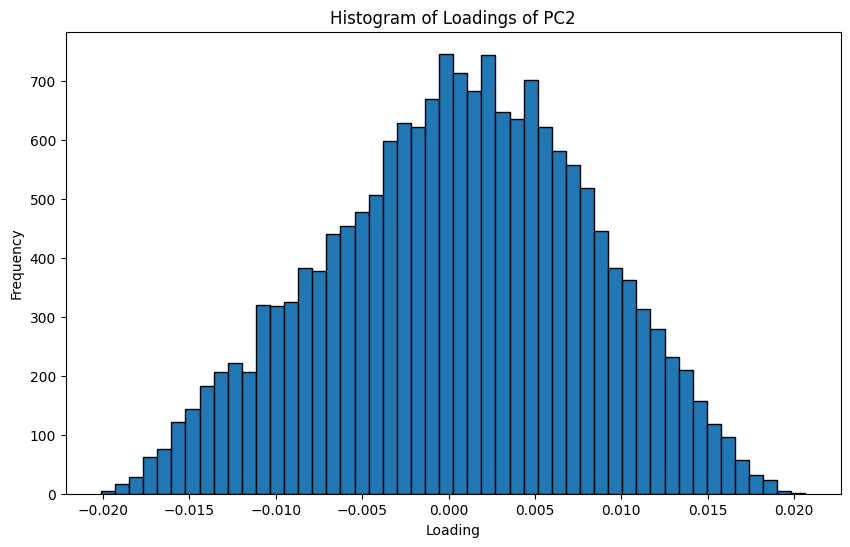

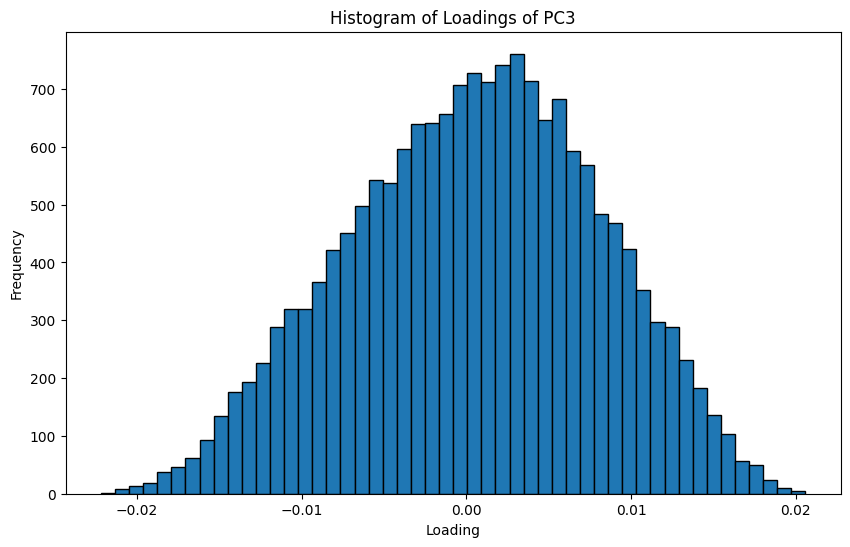

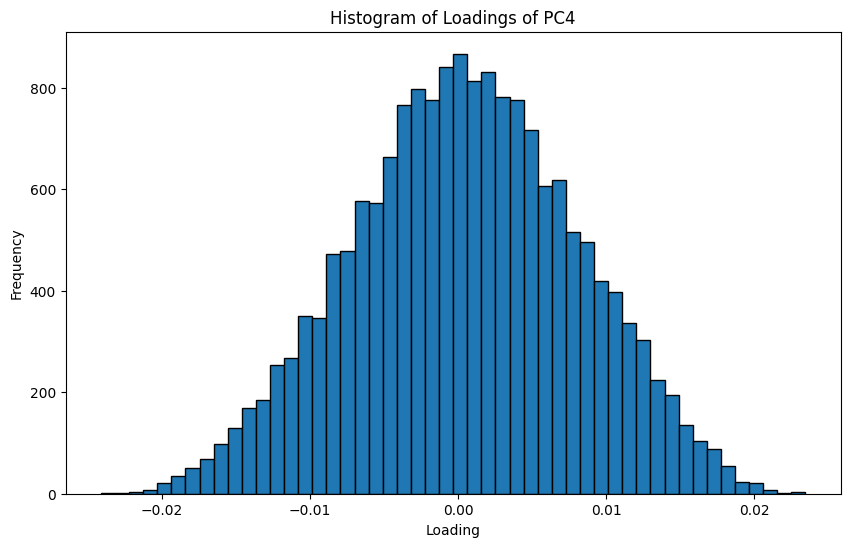

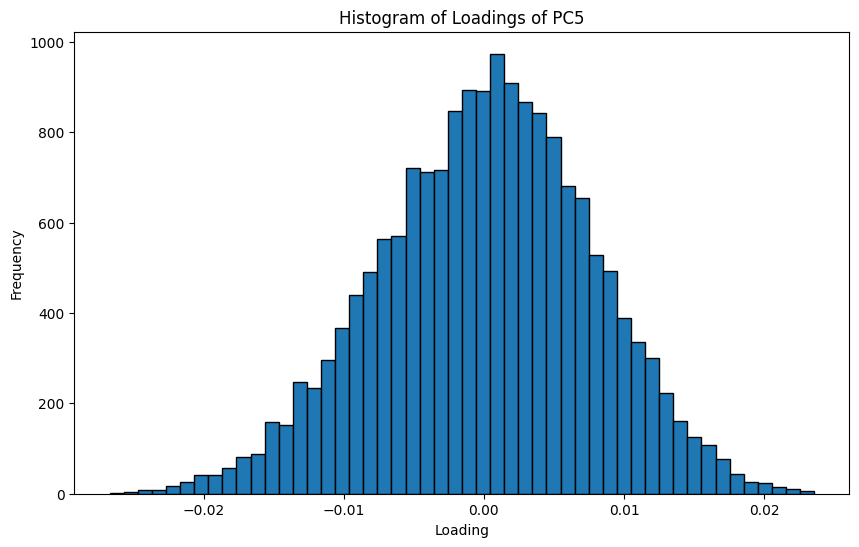

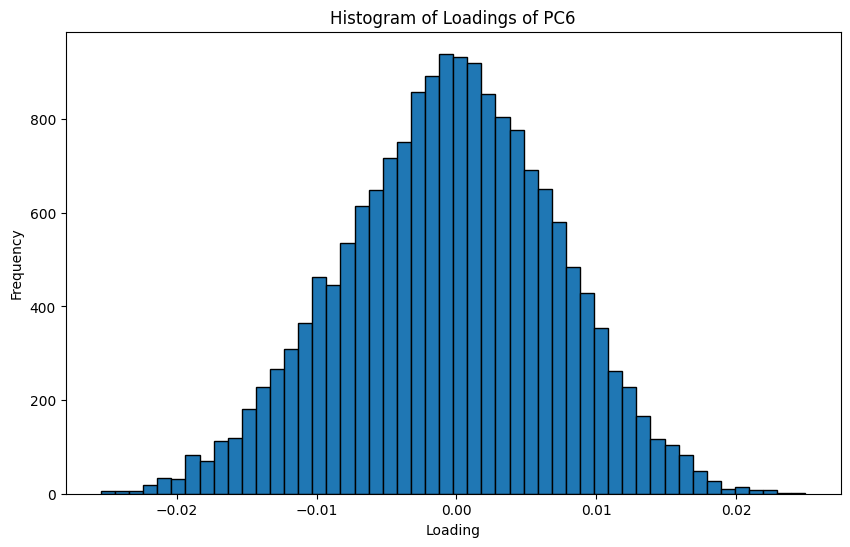

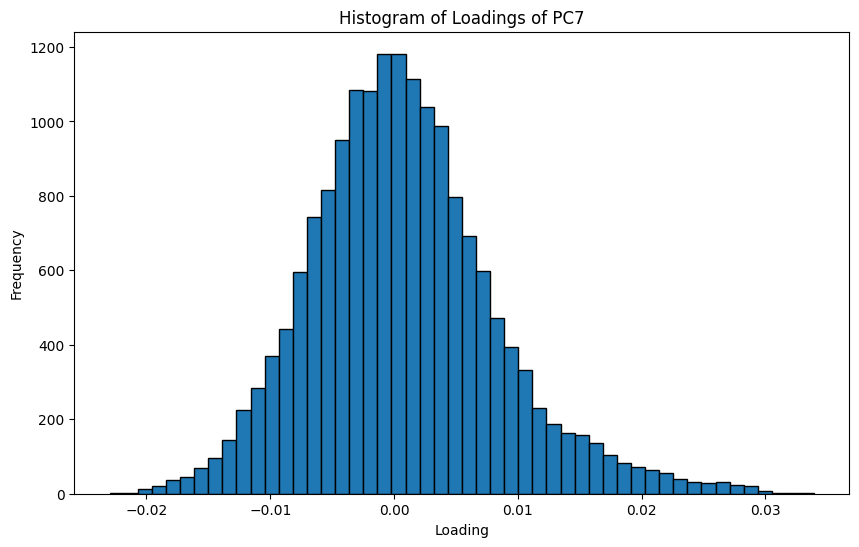

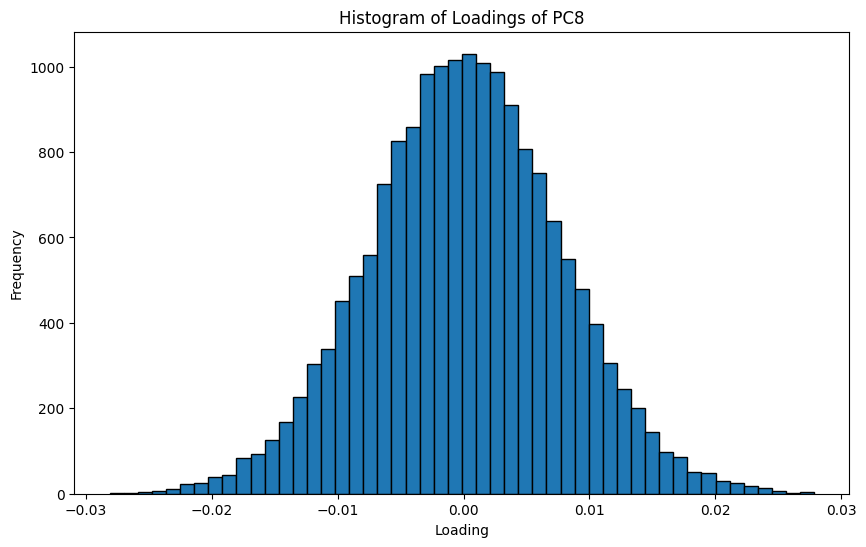

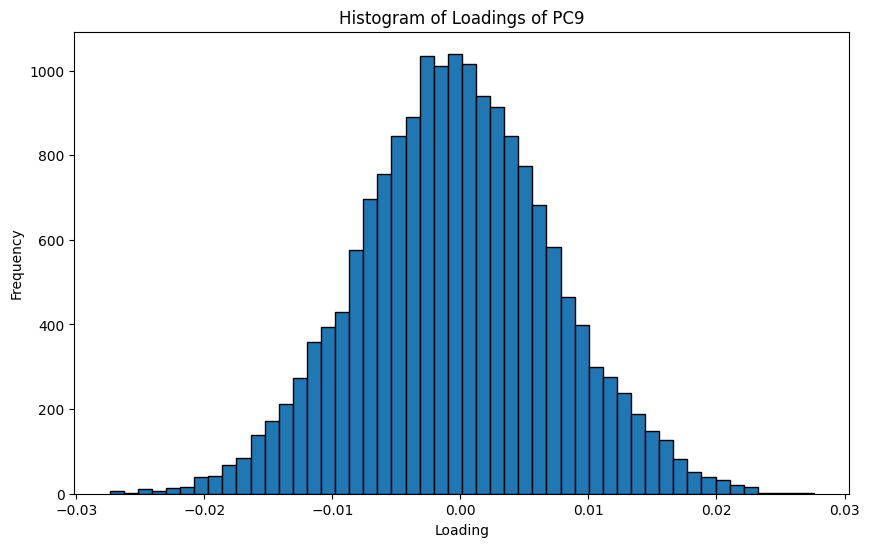

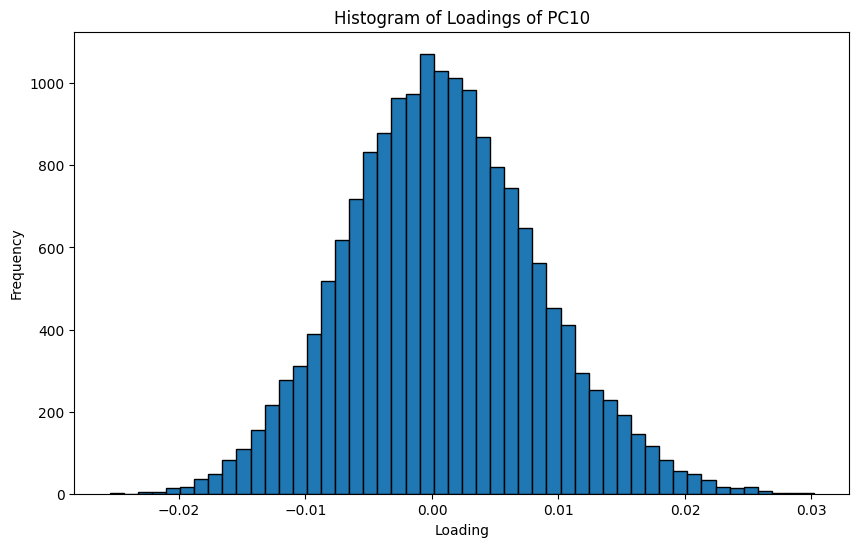

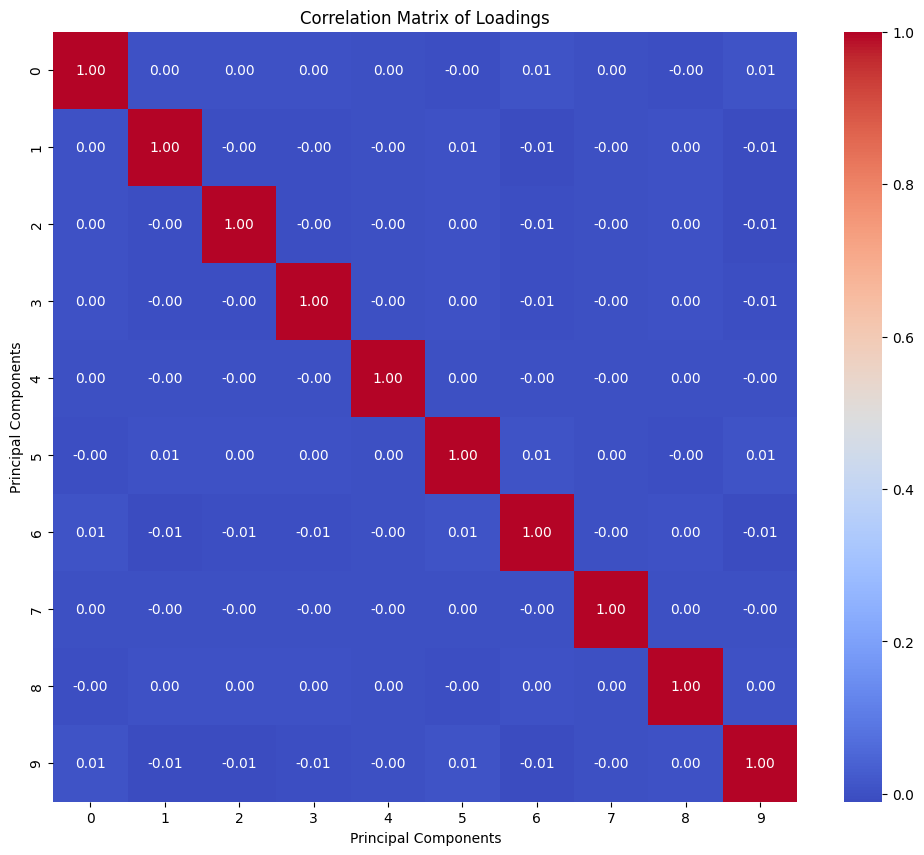

In [28]:
# Load the data
data_path = 'C:/Users/ABDULLAHI HAJI/OneDrive/Documents/Thesis_poject/GSE216738_RAW_COUNTS_Abnormal-AML-50bp/normCounts_res.CSV'
data = pd.read_csv(data_path, index_col=0)

# Transpose the data so that genes are columns and samples are rows
data_transposed = data.T

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_transposed)

# Perform PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(scaled_data)
loadings = pca.components_.T

# Convert to DataFrame for easier handling
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['PC' + str(i) for i in range(1, 11)])

# Calculate eigenvalues
eigenvalues = pca.explained_variance_

# Create a Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.savefig('Scree plot.png')
plt.show()

# Specify the number of top contributing genes to display in the loading plots
num_top_genes = 1000

# Print the top 1000 contributing genes for each principal component
for i, component in enumerate(pca.components_):
    sorted_indices = np.argsort(np.abs(component))[::-1]
    top_feature_indices = sorted_indices[:num_top_genes]
    top_features = [data_transposed.columns[j] for j in top_feature_indices]
    """print(f"Top 10 contributing genes for PC{i + 1}: {top_features}")"""

# Calculate and print the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i + 1} explains {ratio * 100:.2f}% of the variance.")


# Square the loadings
squared_loadings = np.square(loadings)

# Create a DataFrame for squared loadings
squared_loadings_df = pd.DataFrame(squared_loadings, columns=['PC' + str(i) for i in range(1, 11)])

# Print the DataFrame
print(squared_loadings_df)

# Combine the loadings from PCA1, PCA2,  PCA3 and PCA4
combined_loadings = np.abs(loadings[:, 0]) + np.abs(loadings[:, 1]) + np.abs(loadings[:, 2] + np.abs(loadings[:, 3]))

# Create a DataFrame for easier handling
loadings_df = pd.DataFrame(combined_loadings, index=data_transposed.columns, columns=['Combined Loadings'])

#print(loadings_df.head())
# Sort the DataFrame based on the combined loadings
sorted_loadings_df = loadings_df.sort_values(by='Combined Loadings', ascending=False)

# Get the top 500 most influential genes
top_500_genes = sorted_loadings_df.head(500)

print (top_500_genes.head())

# Save the DataFrame to a CSV file
top_500_genes.to_csv('top_500_genes_from_PCA.csv')


# Create a histogram of the loadings for each principal component
for i in range(pca.n_components_):
    plt.figure(figsize=(10, 6))
    plt.hist(loadings[:, i], bins=50, edgecolor='black')
    plt.title(f'Histogram of Loadings of PC{i + 1}')
    plt.xlabel('Loading')
    plt.ylabel('Frequency')
    plt.show()

# Generate a correlation matrix plot for loadings
correlation_matrix = np.corrcoef(loadings.T)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Principal Components')
plt.show()

